# *k* Nearest Neighbour

## Use `NearestNeighbors` to identify neighbours.  
Objective is to work down through this notebook and make sure you understand what is going on.   
Where necessary, look up Python help to understand what the methods take as arguments or return.

### Athlete Selection Data  
First load dataset into a data frame.

In [16]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
athlete = pd.read_csv('data/AthleteSelection.csv',index_col = 'Athlete')
athlete.head()

,Speed,Agility,Selected
Athlete,,,
x1,2.50,6.00,No
x2,3.75,8.00,No
x3,2.25,5.50,No
x4,3.25,8.25,No
x5,2.75,7.50,No


In [2]:
names = athlete.index
names

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
      dtype='object', name='Athlete')

In [3]:
# Store features and labels in numpy arrays X and y
y = athlete.pop('Selected').values
X = athlete.values
q = [5.0,7.5]
X[0]

array([2.5, 6. ])

In [4]:
athlete

,Speed,Agility
Athlete,,
x1,2.50,6.00
x2,3.75,8.00
x3,2.25,5.50
x4,3.25,8.25
x5,2.75,7.50
x6,4.50,5.00
x7,3.50,5.25
x8,3.00,3.25
x9,4.00,4.00


### Plot this dataset

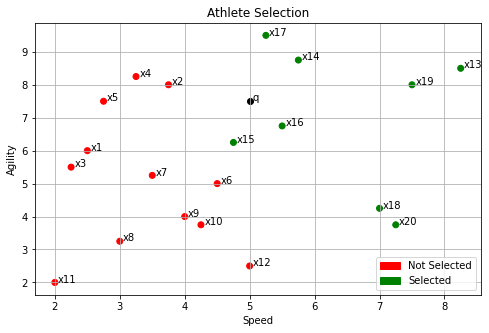

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color= ['red' if l == 'No' else 'green' for l in y]
x1 = X[:,0]
x2 = X[:,1]
plt.figure(figsize=(8,5))
plt.scatter(x1,x2, color=color)
plt.scatter(q[0],q[1],color='black')
plt.annotate('q',(q[0]+0.05,q[1]))
plt.title("Athlete Selection")
plt.xlabel("Speed")
plt.ylabel("Agility")
plt.grid()
red_patch = mpatches.Patch(color='red', label='Not Selected')
blue_patch = mpatches.Patch(color='green', label='Selected')
plt.legend(handles=[red_patch, blue_patch],loc=4)
for i, txt in enumerate(names):
    plt.annotate(txt, (x1[i]+0.05, x2[i]))

## Data Normalization
Features may be measured on very different scales.  
(Not really an issue here.)  
Rescale the data so that all features have the same scale, two options:
- N(0,1) rescale with zero mean and unit variance
- MinMax scaling - typically in the range (0,1)

### N(0,1) normalisation

In [6]:
scaler = preprocessing.StandardScaler().fit(X)  #need a handle on the scaler to apply to training and test data
X_scaled = scaler.transform(X)
q_scaled = scaler.transform([q])
q_scaled

array([[0.22330171, 0.75770254]])

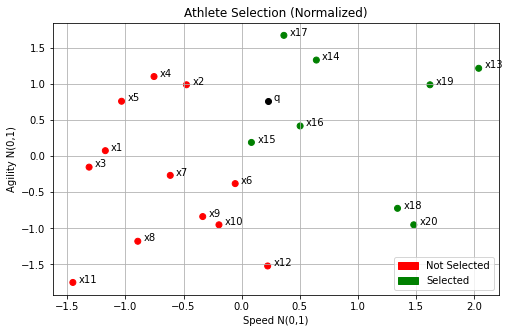

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color= ['red' if l == 'No' else 'green' for l in y]
x1 = X_scaled[:,0]
x2 = X_scaled[:,1]
plt.figure(figsize=(8,5))
plt.scatter(x1,x2, color=color)
plt.scatter(q_scaled[0,0],q_scaled[0,1],color='black')
plt.annotate('q',(q_scaled[0,0]+0.05,q_scaled[0,1]))
plt.title("Athlete Selection (Normalized)")
plt.xlabel("Speed N(0,1)")
plt.ylabel("Agility N(0,1)")
plt.grid()
red_patch = mpatches.Patch(color='red', label='Not Selected')
blue_patch = mpatches.Patch(color='green', label='Selected')
plt.legend(handles=[red_patch, blue_patch],loc=4)
for i, txt in enumerate(names):
    plt.annotate(txt, (x1[i]+0.05, x2[i]))

In [8]:
athlete_neigh = NearestNeighbors(n_neighbors=2, radius=0.4)
athlete_neigh.fit(X_scaled)

NearestNeighbors(n_neighbors=2, radius=0.4)

In [9]:
athlete_neigh

NearestNeighbors(n_neighbors=2, radius=0.4)

In [13]:
# Find x nearest neighbours for X4
x4 = X_scaled[3]
athlete_neigh.kneighbors([x4], 2, return_distance=True)

#what are the neighbours returned?  Are these correct? 

(array([[0.        , 0.30148688]]), array([[3, 1]]))

In [17]:
# Find nearest neighbours for X4 within a radius 
athlete_neigh.radius_neighbors([x4], 1.0, return_distance=True)

(array([array([0.30148688, 0.        , 0.44130868])], dtype=object),
 array([array([1, 3, 4])], dtype=object))

In [18]:
# Find three nearest neighbours for q
q = [5.0,7.5]
q3n = athlete_neigh.kneighbors([q], 3)[1][0]
# q3n contains the 'index' of the nearest neighbours
for n in q3n:
    print(names[n])

x13
x19
x17


## *k*-NN Classifier



In [19]:
kNN = KNeighborsClassifier(n_neighbors = 3)
kNN = kNN.fit(X,y)
kNN.predict(q_scaled)

array(['No'], dtype=object)

In [20]:
q_scaled

array([[0.22330171, 0.75770254]])

## Forecast data

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn import preprocessing

train = pd.read_csv('../data/Forecast.csv')
train.head(5)

,Temperature,Humidity,Wind_Speed,Go-Out
0,6,85,30,0
1,14,90,35,0
2,15,86,8,1
3,21,56,15,1
4,17,67,9,1


In [3]:
train.shape

(18, 4)

In [4]:
y = train.pop('Go-Out').values # y is a numpy array with the class labels

In [5]:
X = train.values.astype(float)  # X is a numpy array with the training data converted to floats

In [6]:
X = train.values

In [7]:
X

array([[ 6, 85, 30],
       [14, 90, 35],
       [15, 86,  8],
       [21, 56, 15],
       [17, 67,  9],
       [ 9, 70, 16],
       [13, 34, 11],
       [17, 95, 32],
       [14, 70, 11],
       [17, 80, 28],
       [15, 70,  6],
       [16, 90,  7],
       [22, 75, 19],
       [16, 91, 28],
       [14, 42,  8],
       [ 7, 95, 21],
       [12, 15, 28],
       [14, 70, 21]], dtype=int64)

In [8]:
X.shape

(18, 3)

In [9]:
# Default k-NN metric is Minkowski with p = 2, i.e. Euclidean
forecast_kNN = KNeighborsClassifier(n_neighbors=3) 
forecast_kNN.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [10]:
forecast_kNN

KNeighborsClassifier(n_neighbors=3)

In [11]:
# Generate predictions (forecasts) for 2 query examples
xinput = np.array([[8.,70.,11.],
                   [8,69,15]])
forecast_kNN.predict(xinput)

array([1, 0], dtype=int64)

In [31]:
# Explicitly find the neighbours (and distances) for a query
q = [8,69,15]
forecast_kNN.kneighbors([q])

(array([[1.73205081, 7.28010989, 8.54400375]]), array([[ 5,  8, 17]]))

In [33]:
y_dash = forecast_kNN.predict(X) # Use training data as test
print('     y:',y)      #print actuals
print('y_dash:',y_dash) #print predictions

     y: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0]
y_dash: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0]


In [34]:
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[ 7  1]
 [ 0 10]]


What is the accuracy here?
What would we expect to happen when k=1? (Try it.)

### Normalise data
The default for `preprocessing.scale` is to convert features to N(0,1)

In [35]:
X_scaled = preprocessing.scale(X)
forecast_kNN_S = KNeighborsClassifier(n_neighbors=3)
forecast_kNN_S.fit(X_scaled,y)
y_dash = forecast_kNN_S.predict(X_scaled)
confusion = confusion_matrix(y, y_dash)   
print("Confusion matrix:\n{}".format(confusion)) 
print('\n     y:',y)           
print('y_dash:',y_dash)          

Confusion matrix:
[[6 2]
 [1 9]]

     y: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0]
y_dash: [0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1]


What is the accuracy here?   
In this case scaling is actually making things worse.

In [ ]:
help(preprocessing)

In [36]:
X_scaled[:5] # First five rows of the scaled data.

array([[-2.08897768,  0.64102699,  1.21956865],
       [-0.09684002,  0.87272349,  1.7498159 ],
       [ 0.15217718,  0.68736629, -1.11351921],
       [ 1.64628042, -0.70281272, -0.37117307],
       [ 0.6502116 , -0.19308042, -1.00746976]])

In [37]:
# predict for query case q
forecast_kNN_S.kneighbors([q])
# What is wrong with this? 
# We haven't scaled the query.

(array([[69.62706959, 69.87454474, 69.91814329]]), array([[ 7,  1, 13]]))

In [38]:
# We need a 'handle' on the scaler so that we can reapply it to the query
scaler = preprocessing.StandardScaler().fit(X) #A scaler object
X_scaled = scaler.transform(X)
q_scaled = scaler.transform([q])
q_scaled[0]

array([-1.59094327, -0.10040182, -0.37117307])

In [39]:
forecast_kNN_S.fit(X_scaled,y)
forecast_kNN_S.kneighbors(q_scaled)

(array([[0.27459677, 1.38509156, 1.55384542]]), array([[ 5, 15,  8]]))

### MinMax Scaling - range (0,1)

In [40]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_scaled01 = min_max_scaler.fit_transform(X)
X_scaled01

array([[0.        , 0.875     , 0.82758621],
       [0.5       , 0.9375    , 1.        ],
       [0.5625    , 0.8875    , 0.06896552],
       [0.9375    , 0.5125    , 0.31034483],
       [0.6875    , 0.65      , 0.10344828],
       [0.1875    , 0.6875    , 0.34482759],
       [0.4375    , 0.2375    , 0.17241379],
       [0.6875    , 1.        , 0.89655172],
       [0.5       , 0.6875    , 0.17241379],
       [0.6875    , 0.8125    , 0.75862069],
       [0.5625    , 0.6875    , 0.        ],
       [0.625     , 0.9375    , 0.03448276],
       [1.        , 0.75      , 0.44827586],
       [0.625     , 0.95      , 0.75862069],
       [0.5       , 0.3375    , 0.06896552],
       [0.0625    , 1.        , 0.51724138],
       [0.375     , 0.        , 0.75862069],
       [0.5       , 0.6875    , 0.51724138]])

## Instance weighting
Why should all neighbours have the same impact on the classification?  
Give nearer neighbours a larger vote.

In [41]:
forecast_kNN_SW = KNeighborsClassifier(n_neighbors=3,weights='distance')
forecast_kNN_SW.fit(X_scaled,y)
y_dash = forecast_kNN_SW.predict(X_scaled)
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 
print('\n     y:',y)
print('y_dash:',y_dash)

Confusion matrix:
[[ 8  0]
 [ 0 10]]

     y: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0]
y_dash: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0]


No errors now as nearest neighbour (itself) gets the largest vote. 